## Analiza eksploracyjna zbioru

Wybranym zbiorem był CIFAR10 składający się z 10 klas obrazów po 6000 elementów. Zbiór nie zawiera wartości nullowych, a rozkład klas jest równomierny, co potwierdza poniższa krótka analiza. Rozmiar każdego obrazu to 32x32.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ssl
import torchvision.datasets as datasets
ssl._create_default_https_context = ssl._create_unverified_context


train_data = datasets.CIFAR10('./data', train=True, download=True)

X_train, y_train = train_data.data, train_data.targets
y_train = np.asarray(y_train)




/Users/martynagrygiel/Documents/studia/sem1/pmg-proj2/pmg-gnn-vae/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


170500096it [00:10, 16711826.04it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data


In [2]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [3]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Class distribution in training set')

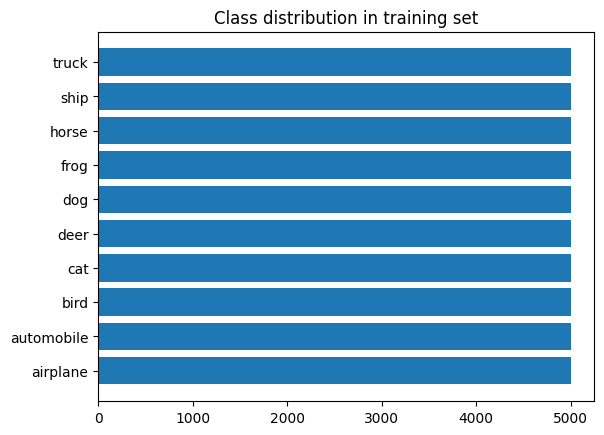

In [4]:

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in training set')

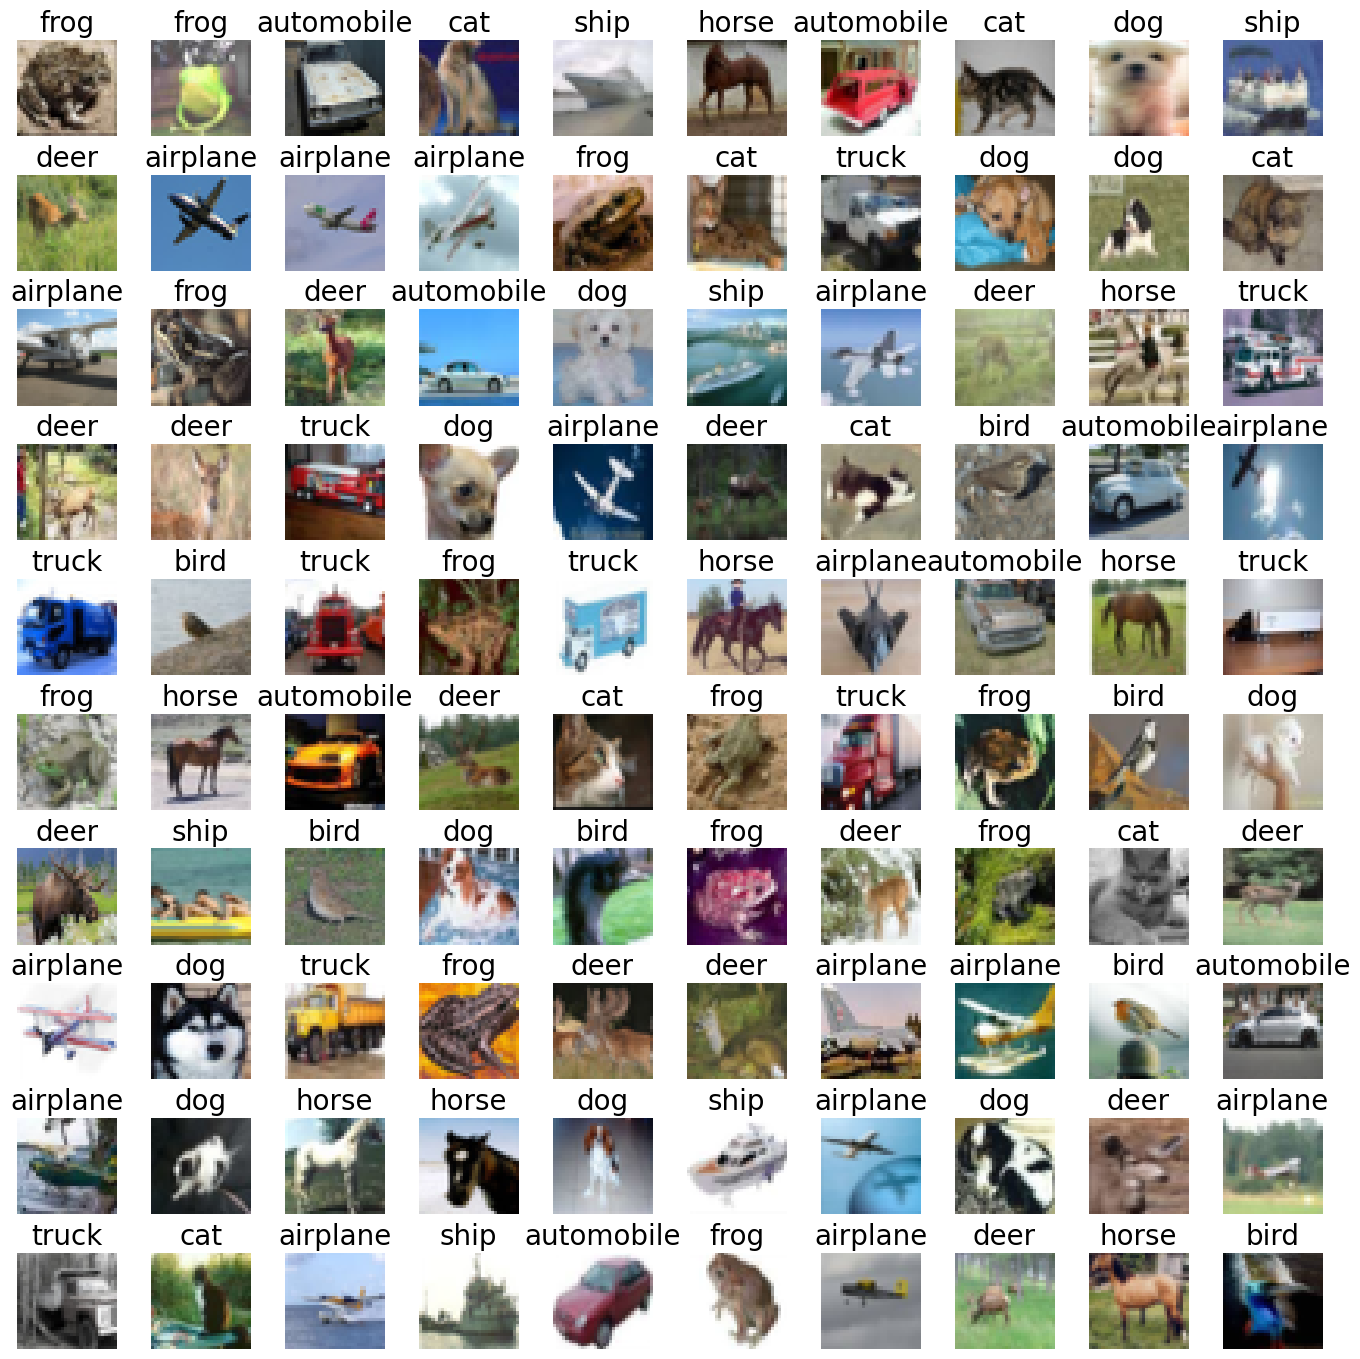

In [5]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_train = len(X_train)

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_train)   
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 20)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)